In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import glob
from IPython.display import display, HTML
from pandas import Series, DataFrame

In [2]:
ru = pd.DataFrame({'Category': ['Average Speed', 'Distance', 'Elevation', 'Time'], 
                   'Unit': ['kph', 'km', 'm', 'sec']}).set_index('Category')
ru_script = ru.to_html()
ru #combike unit
#print(ru_script)

,Unit
Category,
Average Speed,kph
Distance,km
Elevation,m
Time,sec


In [3]:
rlist = [] #relive list of dataframes
for rgather in glob.glob('data/*_relive.csv'): #relive gather records
    print(f'Loading {rgather}')
    rmerged = pd.read_csv(rgather, parse_dates=["Date"]).sort_index() #relive merged records
    rlist.append(rmerged)

print('Number of Files Loaded: ',len(rlist))

rt = pd.concat(rlist).set_index('Date') #relive total
rst = rt.reindex(sorted(rt.columns), axis=1) #relive sorted total
rst.tail()

Loading data\20240617_relive.csv
Loading data\20240821_relive.csv
Number of Files Loaded:  2


,Average Speed,Distance,Elevation,Purpose,Time
Date,,,,,
2024-06-17,15.0,47.2,451,Training,11280
2024-08-21,14.7,16.6,191,Bike to Work,4020
2024-08-21,12.1,6.7,41,Home from Work,1980


In [49]:
dg = rst.groupby("Purpose") #draft group
rg = dg.size().reset_index().rename(columns={0: 'Count'}) #relive group
tc = rg['Count'].sum() #total count

rc = pd.DataFrame({'Inventory' : ['Total Records', 'Files Loaded'], 'Count' : [tc, len(rlist)]}).set_index('Inventory')
rc #relive count
rc_script = rc.to_html()
#rc_script
rc
rg

,Purpose,Count
0,Bike to Work,1
1,Home from Work,1
2,Training,1


In [5]:
rave = pd.pivot_table(data=rst,index=['Purpose', "Distance"]).round(2) 
rave.columns = pd.MultiIndex.from_product([['Ave'], ["Average Speed", "Elevation", "Time"]])
rave_script = rave.to_html()
#rave_script
rave #relive average per purpose

Ave                   
                        Average Speed Elevation     Time
Purpose        Distance                                 
Bike to Work   16.6              14.7     191.0   4020.0
Home from Work 6.7               12.1      41.0   1980.0
Training       47.2              15.0     451.0  11280.0

In [6]:
rsum = rst[["Distance", "Elevation", "Time"]].sum().reset_index().rename(columns={0: 'Sum', 'index': 'Category'}).round(2).set_index('Category')
rsum_script = rsum.to_html()
#rsum_script
rsum #relive sum all purpose

,Sum
Category,
Distance,70.5
Elevation,683.0
Time,17280.0


In [10]:
p1 = dg.get_group("Bike to Work").set_index('Purpose')
rminp1 = p1[["Average Speed", "Distance", "Elevation", "Time"]].min().reset_index().rename(columns={0: 'Bike to Work', 'index': 'Category'}).round(2).set_index('Category') #relive min bike to work purpose
p2 = dg.get_group("Home from Work").set_index('Purpose')
rminp2 = p2[["Average Speed", "Distance", "Elevation", "Time"]].min().reset_index().rename(columns={0: 'Home from Work', 'index': 'Category'}).round(2).set_index('Category') #relive min home from work purpose
p3 = dg.get_group("Training").set_index('Purpose')
rminp3 = p3[["Average Speed", "Distance", "Elevation", "Time"]].min().reset_index().rename(columns={0: 'Training', 'index': 'Category'}).round(2).set_index('Category') #relive min training purpose
rminlist = [rminp1, rminp2, rminp3]
rmint = pd.concat(rminlist, axis=1)
rmint.columns = pd.MultiIndex.from_product([['Min'], ["Bike to Work", "Home from Work", "Training"]])
rmint #relive min total

p1 = dg.get_group("Bike to Work").set_index('Purpose')
rmaxp1 = p1[["Average Speed", "Distance", "Elevation", "Time"]].max().reset_index().rename(columns={0: 'Bike to Work', 'index': 'Category'}).round(2).set_index('Category') #relive max bike to work purpose
p2 = dg.get_group("Home from Work").set_index('Purpose')
rmaxp2 = p2[["Average Speed", "Distance", "Elevation", "Time"]].max().reset_index().rename(columns={0: 'Home from Work', 'index': 'Category'}).round(2).set_index('Category') #relive max home from work purpose
p3 = dg.get_group("Training").set_index('Purpose')
rmaxp3 = p3[["Average Speed", "Distance", "Elevation", "Time"]].max().reset_index().rename(columns={0: 'Training', 'index': 'Category'}).round(2).set_index('Category') #relive max training purpose
rmaxlist = [rmaxp1, rmaxp2, rmaxp3]
rmaxt = pd.concat(rmaxlist, axis=1)
rmaxt.columns = pd.MultiIndex.from_product([['Max'], ["Bike to Work", "Home from Work", "Training"]])
rmaxt #relive max total

rminmax = pd.concat ([rmint, rmaxt], axis=1)
rminmax_script = rminmax.to_html()
#rminmax_script
rminmax

Min                                  Max  \
              Bike to Work Home from Work Training Bike to Work   
Category                                                          
Average Speed         14.7           12.1     15.0         14.7   
Distance              16.6            6.7     47.2         16.6   
Elevation            191.0           41.0    451.0        191.0   
Time                4020.0         1980.0  11280.0       4020.0   

                                       
              Home from Work Training  
Category                               
Average Speed           12.1     15.0  
Distance                 6.7     47.2  
Elevation               41.0    451.0  
Time                  1980.0  11280.0

In [12]:
as_b2w = rst.loc[rst["Purpose"] == "Bike to Work"].loc[:,"Average Speed"]
as_b2wd = as_b2w.to_frame(name="Bike to Work")
as_hfw = rst.loc[rst["Purpose"] == "Home from Work"].loc[:,"Average Speed"]
as_hfwd = as_hfw.to_frame(name="Home from Work")
as_tra = rst.loc[rst["Purpose"] == "Training"].loc[:,"Average Speed"]
as_trad = as_tra.to_frame(name="Training")
aslist = [as_b2wd, as_hfwd, as_trad]
ast = pd.concat(aslist, axis=1).fillna(0)
ast.columns = pd.MultiIndex.from_product([["Average Speed"], ["Bike to Work", "Home from Work", "Training"]])
ast.head() #average speed total

Average Speed                        
            Bike to Work Home from Work Training
Date                                            
2024-06-17           0.0            0.0     15.0
2024-08-21          14.7           12.1      0.0

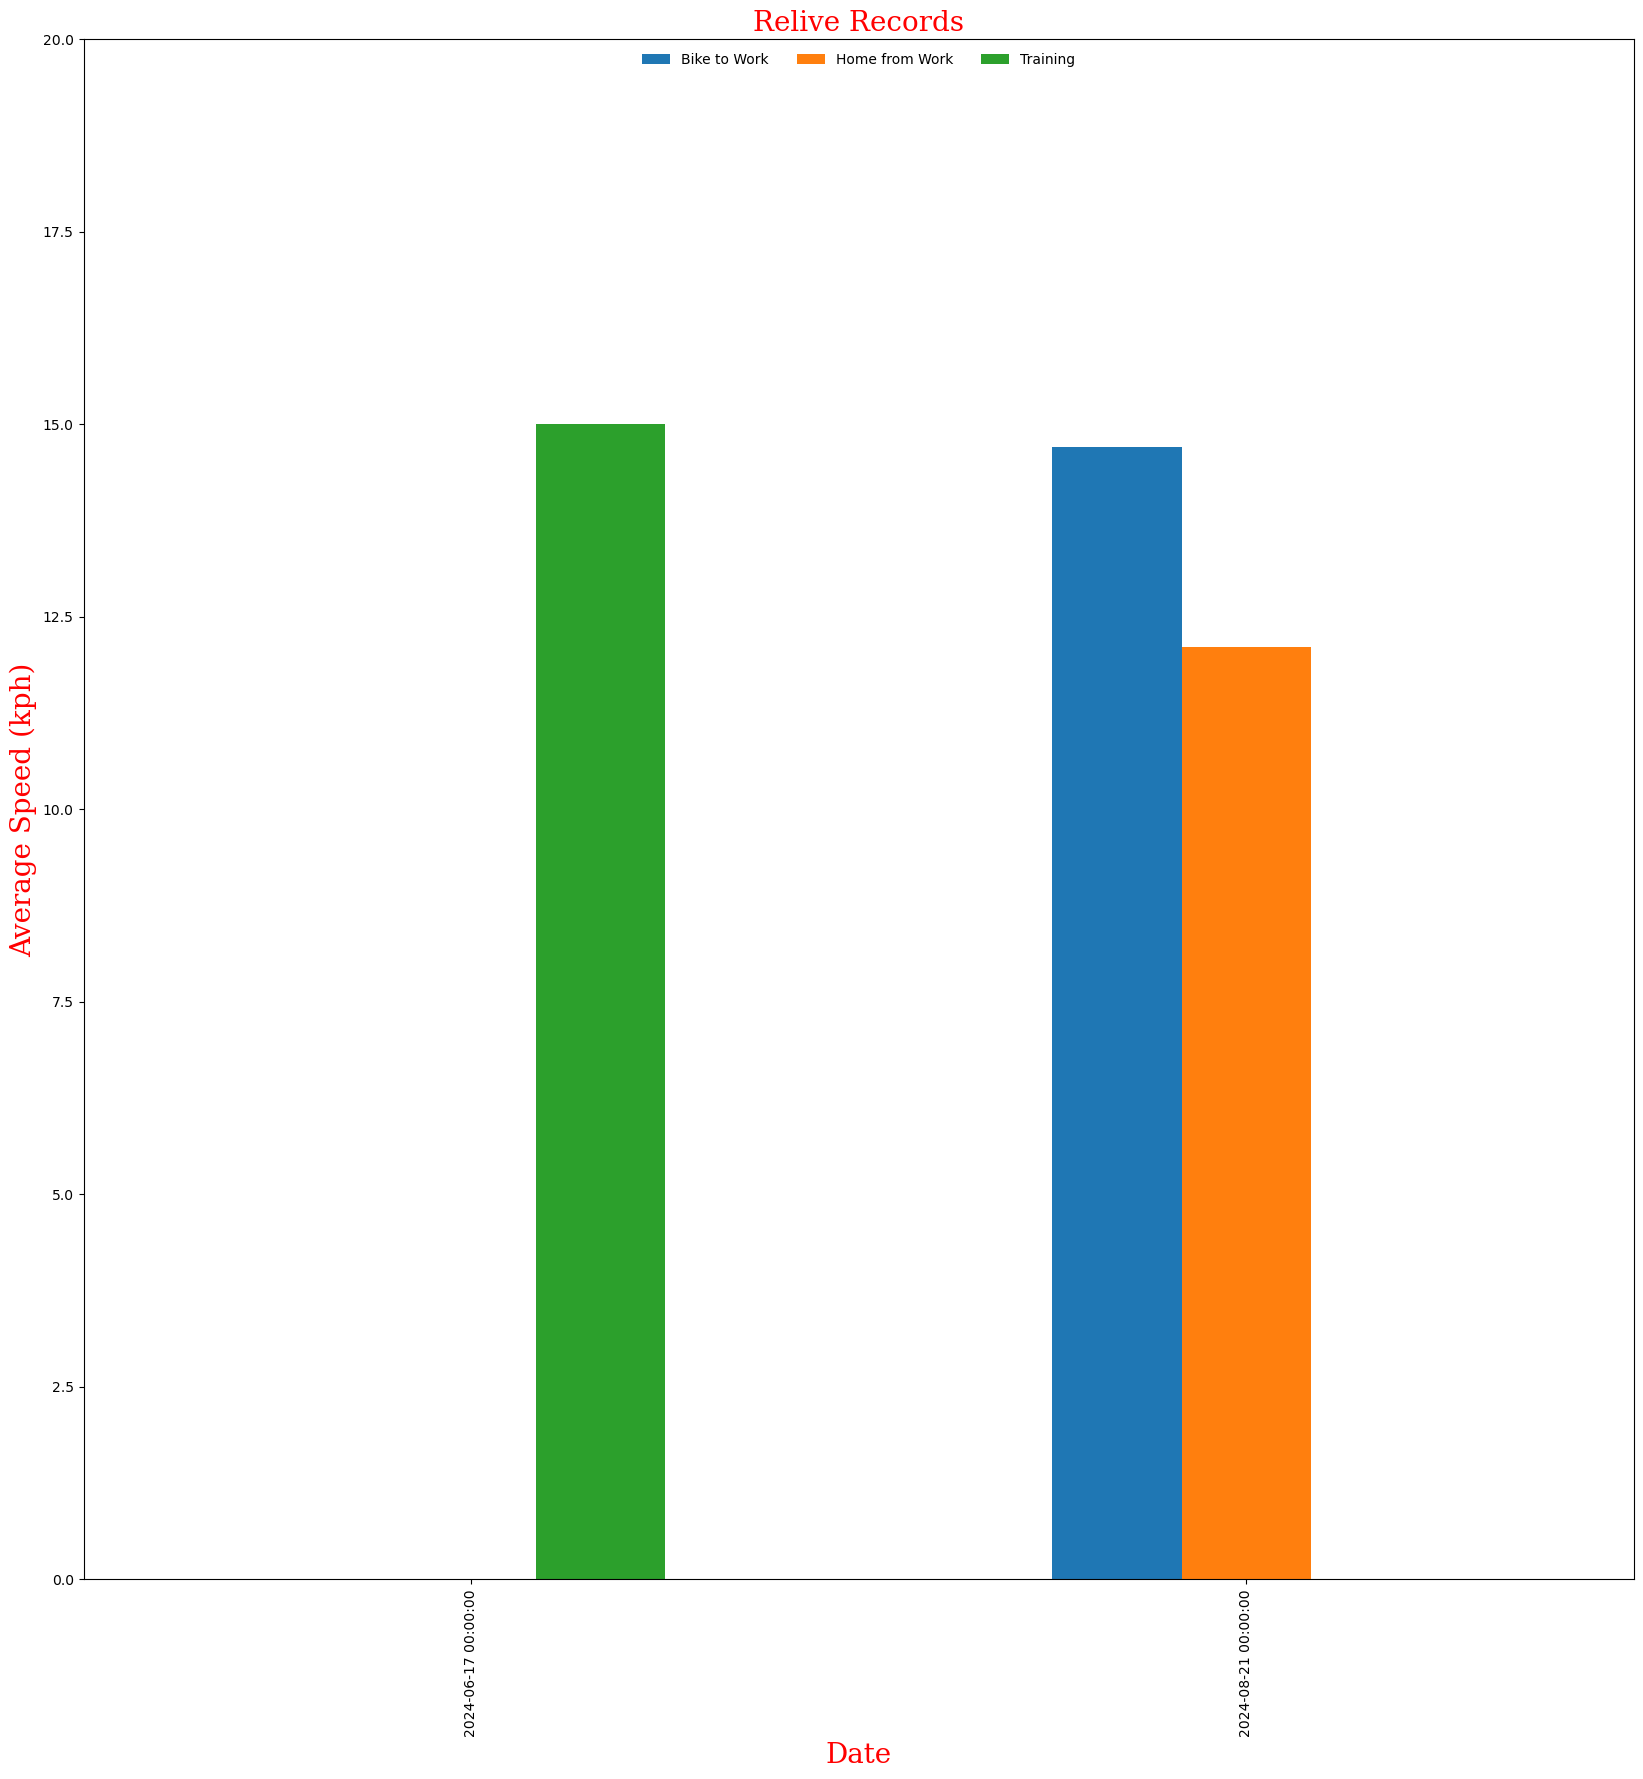

In [14]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
ast.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Relive Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Average Speed (kph)', fontdict=f1)
plt.ylim(0, 20)
plt.savefig("fig/ast_relive.png")
plt.show()

In [15]:
d_b2w = rst.loc[rst["Purpose"] == "Bike to Work"].loc[:,"Distance"]
d_b2wd = d_b2w.to_frame(name="Bike to Work")
d_hfw = rst.loc[rst["Purpose"] == "Home from Work"].loc[:,"Distance"]
d_hfwd = d_hfw.to_frame(name="Home from Work")
d_tra = rst.loc[rst["Purpose"] == "Training"].loc[:,"Distance"]
d_trad = d_tra.to_frame(name="Training")
dlist = [d_b2wd, d_hfwd, d_trad]
dt = pd.concat(dlist, axis=1).fillna(0)
dt.columns = pd.MultiIndex.from_product([["Distance"], ["Bike to Work", "Home from Work", "Training"]])
dt.head() #distance total

Distance                        
           Bike to Work Home from Work Training
Date                                           
2024-06-17          0.0            0.0     47.2
2024-08-21         16.6            6.7      0.0

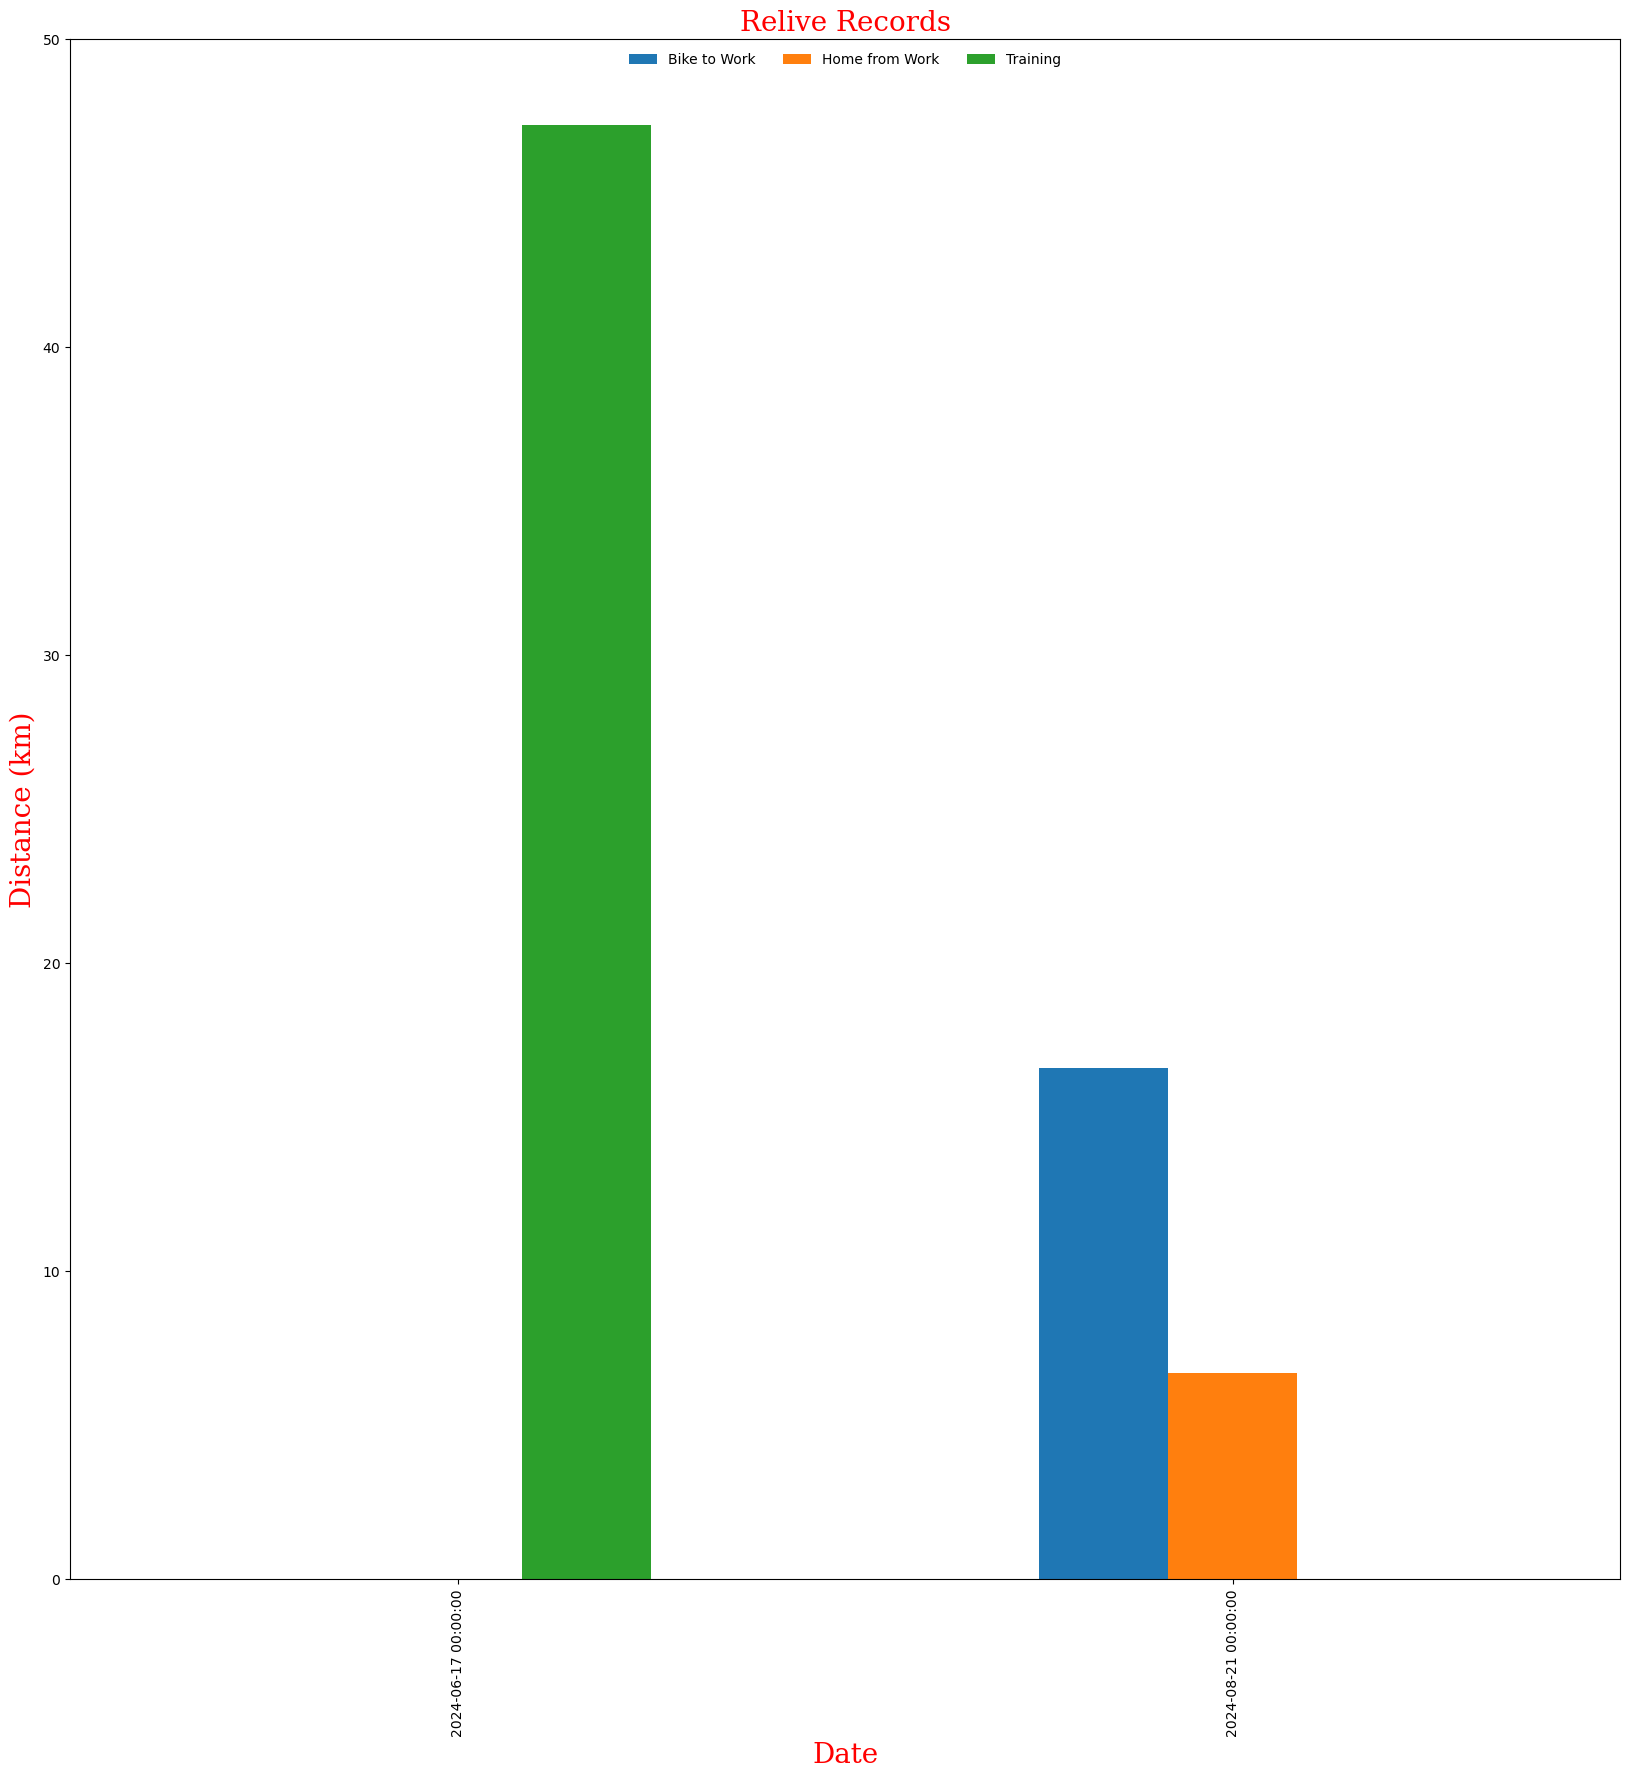

In [45]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
dt.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Relive Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Distance (km)', fontdict=f1)
plt.ylim(0, 50)
plt.savefig("fig/dt_relive.png")
plt.show()

In [20]:
e_b2w = rst.loc[rst["Purpose"] == "Bike to Work"].loc[:,"Elevation"]
e_b2wd = e_b2w.to_frame(name="Bike to Work")
e_hfw = rst.loc[rst["Purpose"] == "Home from Work"].loc[:,"Elevation"]
e_hfwd = e_hfw.to_frame(name="Home from Work")
e_tra = rst.loc[rst["Purpose"] == "Training"].loc[:,"Elevation"]
e_trad = e_tra.to_frame(name="Training")
dlist = [e_b2wd, e_hfwd, e_trad]
et = pd.concat(dlist, axis=1).fillna(0)
et.columns = pd.MultiIndex.from_product([["eevation"], ["Bike to Work", "Home from Work", "Training"]])
et.head() #elevation total

eevation                        
           Bike to Work Home from Work Training
Date                                           
2024-06-17          0.0            0.0    451.0
2024-08-21        191.0           41.0      0.0

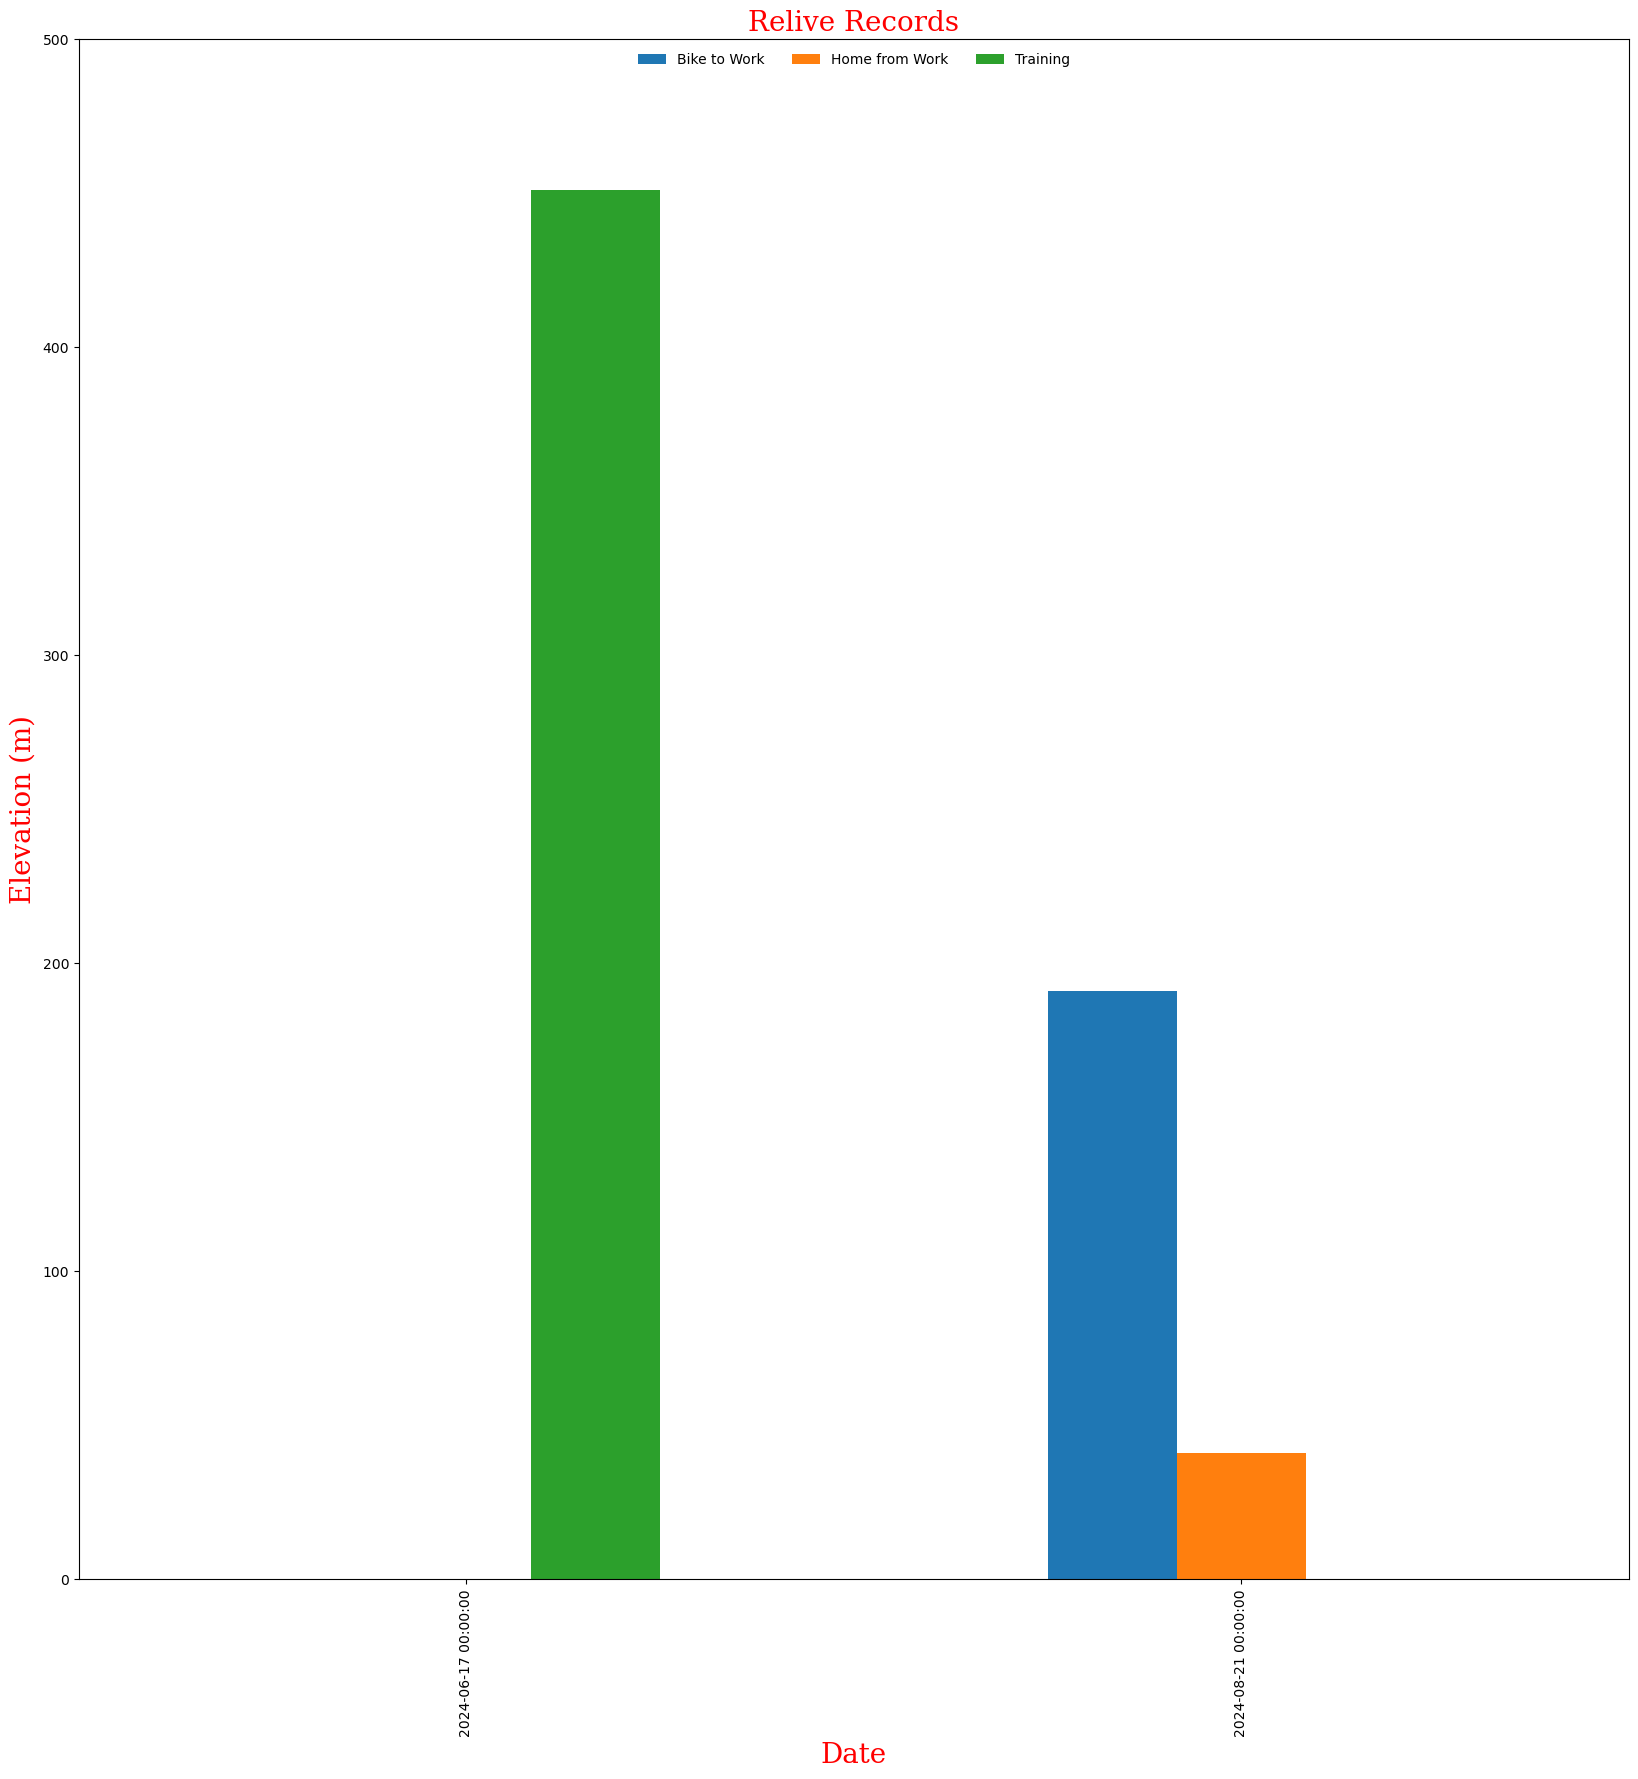

In [21]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
et.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Relive Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Elevation (m)', fontdict=f1)
plt.ylim(0, 500)
plt.savefig("fig/et_relive.png")
plt.show()

In [23]:
t_b2w = rst.loc[rst["Purpose"] == "Bike to Work"].loc[:,"Time"]
t_b2wd = t_b2w.to_frame(name="Bike to Work")
t_hfw = rst.loc[rst["Purpose"] == "Home from Work"].loc[:,"Time"]
t_hfwd = t_hfw.to_frame(name="Home from Work")
t_tra = rst.loc[rst["Purpose"] == "Training"].loc[:,"Time"]
t_trad = t_tra.to_frame(name="Training")
dlist = [t_b2wd, t_hfwd, t_trad]
tt = pd.concat(dlist, axis=1).fillna(0)
tt.columns = pd.MultiIndex.from_product([["Time"], ["Bike to Work", "Home from Work", "Training"]])
tt.head() #time total

Time                        
           Bike to Work Home from Work Training
Date                                           
2024-06-17          0.0            0.0  11280.0
2024-08-21       4020.0         1980.0      0.0

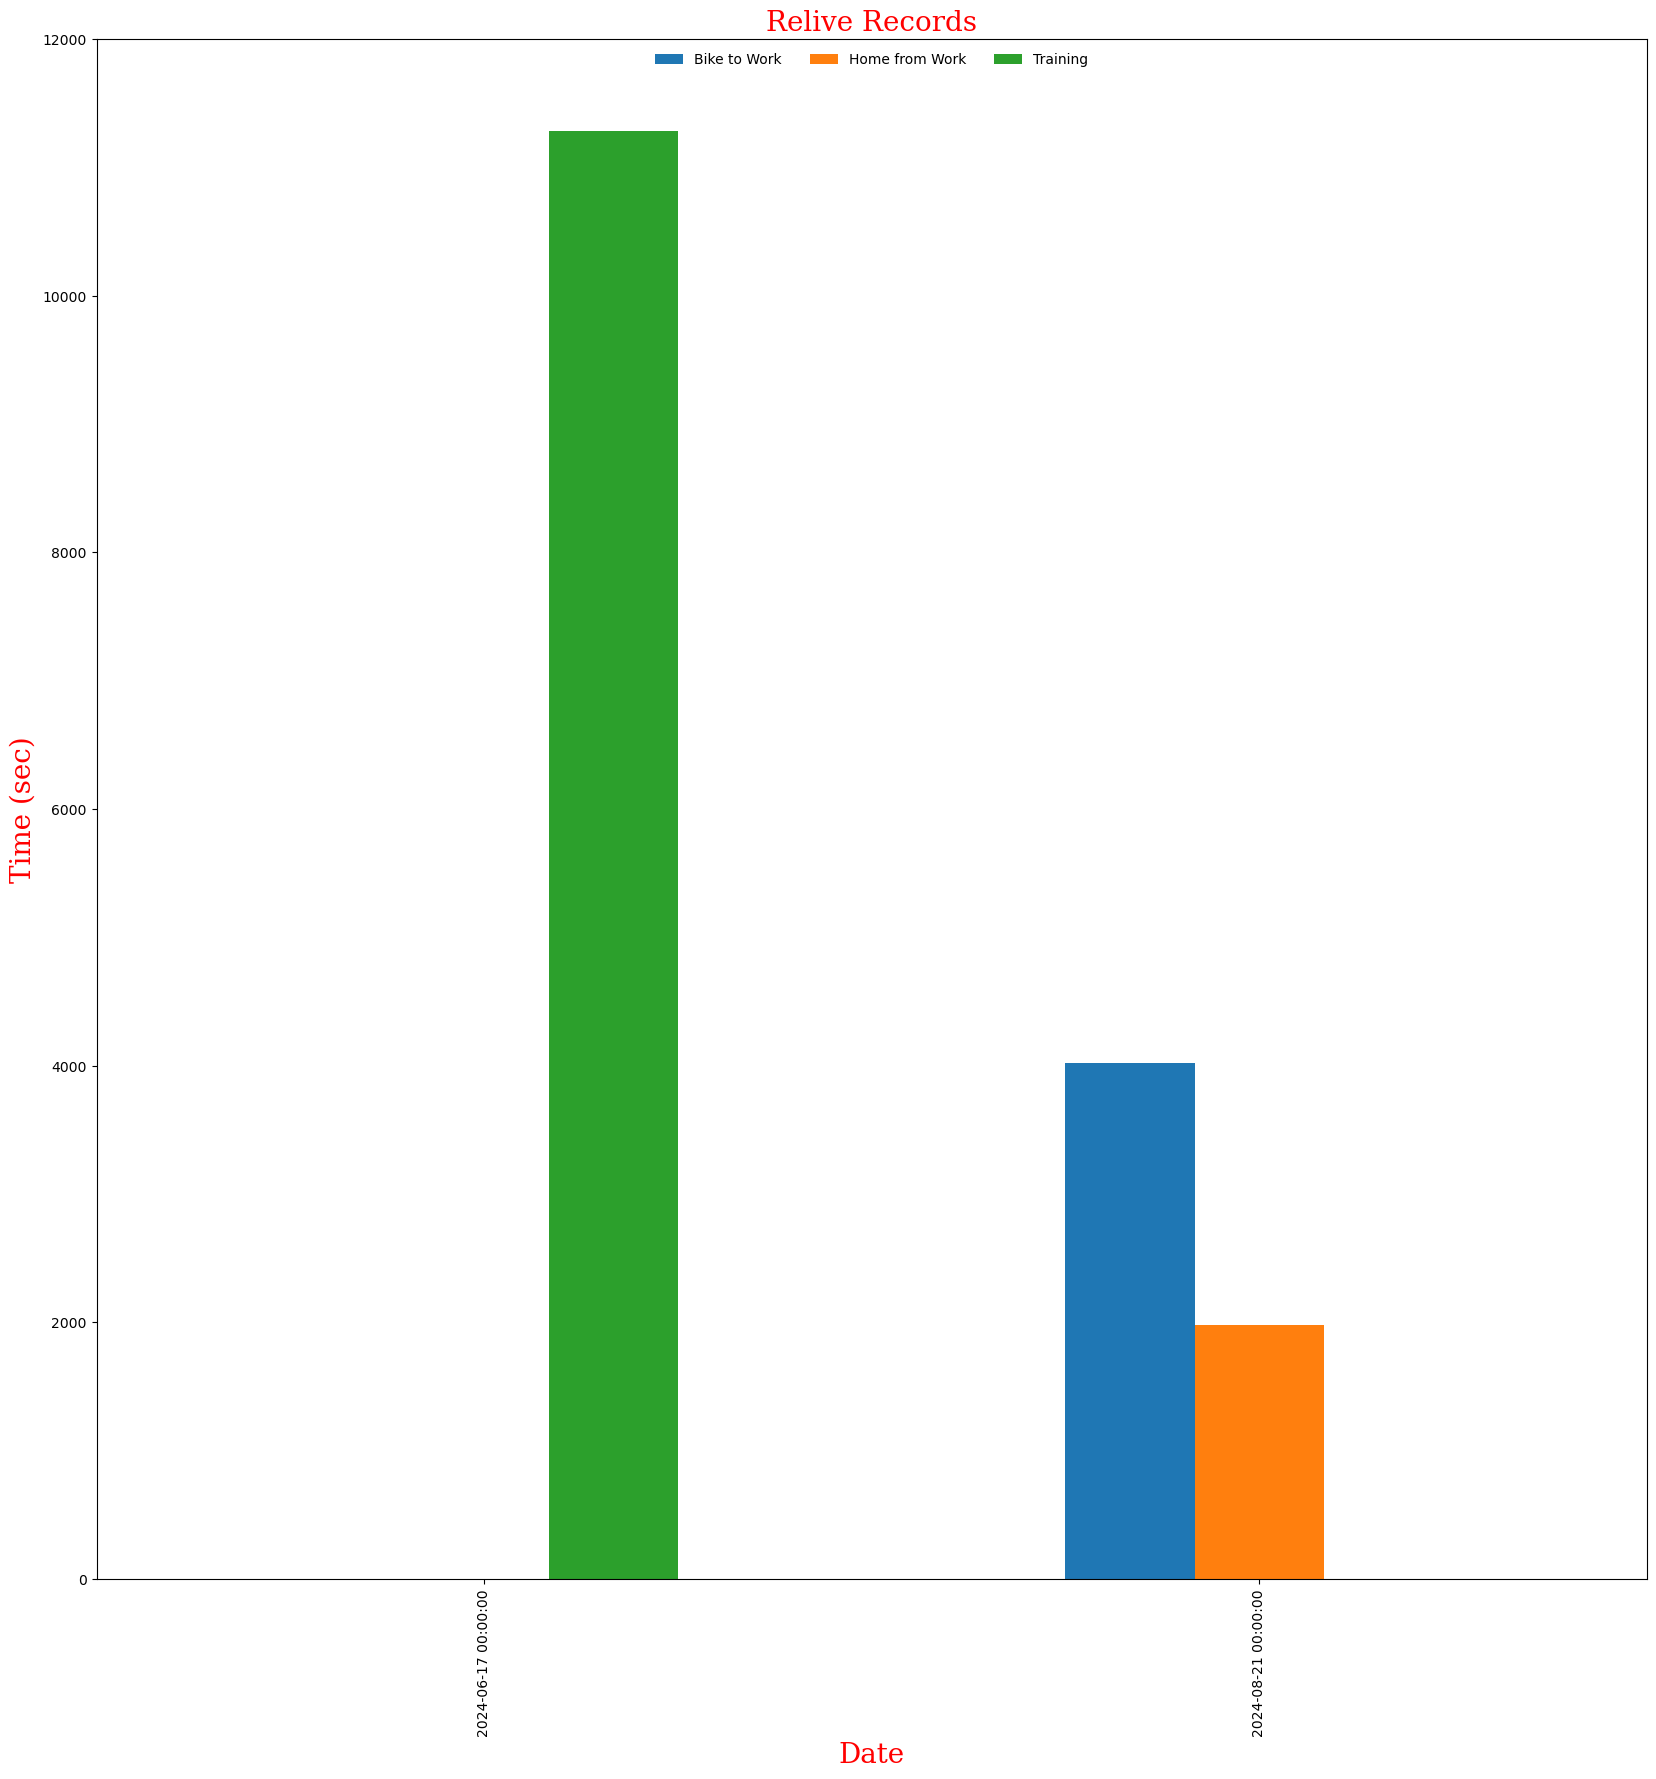

In [25]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
tt.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Relive Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Time (sec)', fontdict=f1)
plt.ylim(0, 12000)
plt.savefig("fig/tt_relive.png")
plt.show()

In [26]:
catt = pd.concat([ast, dt, et, tt], axis=1)
catt.head() #category total merged

Average Speed                             Distance                 \
            Bike to Work Home from Work Training Bike to Work Home from Work   
Date                                                                           
2024-06-17           0.0            0.0     15.0          0.0            0.0   
2024-08-21          14.7           12.1      0.0         16.6            6.7   

                        eevation                                 Time  \
           Training Bike to Work Home from Work Training Bike to Work   
Date                                                                    
2024-06-17     47.2          0.0            0.0    451.0          0.0   
2024-08-21      0.0        191.0           41.0      0.0       4020.0   

                                    
           Home from Work Training  
Date                                
2024-06-17            0.0  11280.0  
2024-08-21         1980.0      0.0

In [36]:
#Rankings Average Speed
asb2w_r = as_b2wd
asb2wr = asb2w_r["Bike to Work"].rank(ascending=False)
asb2w_r['B2WR'] = asb2wr
asb2w_r = asb2w_r.sort_values('B2WR').head(3)

ashfw_r = as_hfwd
ashfwr = ashfw_r["Home from Work"].rank(ascending=False)
ashfw_r['HFWR'] = ashfwr
ashfw_r = ashfw_r.sort_values('HFWR').head(3)

astra_r = as_trad
astrar = astra_r["Training"].rank(ascending=False)
astra_r['TRAR'] = astrar
astra_r = astra_r.sort_values('TRAR').head(3)

aslistr = [asb2w_r, ashfw_r, astra_r]
astr = pd.concat(aslistr, axis=1).fillna('0').sort_values(['B2WR', 'HFWR', 'TRAR'], ascending=[True,True,True])
astr.columns = pd.MultiIndex.from_product([["Average Speed"], ["Bike to Work", "B2WR", "Home from Work", "HFWR", "Training", "TRAR"]])
astr = astr.iloc[:, [0,2,4]].astype(float)
astr #average speed total rank

Average Speed                        
            Bike to Work Home from Work Training
Date                                            
2024-08-21          14.7           12.1      0.0
2024-06-17           0.0            0.0     15.0

In [37]:
#Rankings Distance
db2w_r = d_b2wd
db2wr = db2w_r["Bike to Work"].rank(ascending=False)
db2w_r['B2WR'] = db2wr
db2w_r = db2w_r.sort_values('B2WR').head(3)

dhfw_r = d_hfwd
dhfwr = dhfw_r["Home from Work"].rank(ascending=False)
dhfw_r['HFWR'] = dhfwr
dhfw_r = dhfw_r.sort_values('HFWR').head(3)

dtra_r = d_trad
dtrar = dtra_r["Training"].rank(ascending=False)
dtra_r['TRAR'] = dtrar
dtra_r = dtra_r.sort_values('TRAR').head(3)

dlistr = [db2w_r, dhfw_r, dtra_r]
dtr = pd.concat(dlistr, axis=1).fillna('0').sort_values(['B2WR', 'HFWR', 'TRAR'], ascending=[True,True,True])
dtr.columns = pd.MultiIndex.from_product([["Distance"], ["Bike to Work", "B2WR", "Home from Work", "HFWR", "Training", "TRAR"]])
dtr = dtr.iloc[:, [0,2,4]].astype(float)
dtr #distance total rank

Distance                        
           Bike to Work Home from Work Training
Date                                           
2024-08-21         16.6            6.7      0.0
2024-06-17          0.0            0.0     47.2

In [40]:
#Rankings Elevation
eb2w_r = e_b2wd
eb2wr = eb2w_r["Bike to Work"].rank(ascending=False)
eb2w_r['B2WR'] = eb2wr
eb2w_r = eb2w_r.sort_values('B2WR').head(3)

ehfw_r = e_hfwd
ehfwr = ehfw_r["Home from Work"].rank(ascending=False)
ehfw_r['HFWR'] = ehfwr
ehfw_r = ehfw_r.sort_values('HFWR').head(3)

etra_r = e_trad
etrar = etra_r["Training"].rank(ascending=False)
etra_r['TRAR'] = etrar
etra_r = etra_r.sort_values('TRAR').head(3)

elistr = [eb2w_r, ehfw_r, etra_r]
etr = pd.concat(elistr, axis=1).fillna('0').sort_values(['B2WR', 'HFWR', 'TRAR'], ascending=[True,True,True])
etr.columns = pd.MultiIndex.from_product([["Elevation"], ["Bike to Work", "B2WR", "Home from Work", "HFWR", "Training", "TRAR"]])
etr = etr.iloc[:, [0,2,4]].astype(float)
etr #Elevation total rank

Elevation                        
           Bike to Work Home from Work Training
Date                                           
2024-08-21        191.0           41.0      0.0
2024-06-17          0.0            0.0    451.0

In [43]:
#Rankings Time
tb2w_r = t_b2wd
tb2wr = tb2w_r["Bike to Work"].rank(ascending=True)
tb2w_r['B2WR'] = tb2wr
tb2w_r = tb2w_r.sort_values('B2WR').head(3)

thfw_r = t_hfwd
thfwr = thfw_r["Home from Work"].rank(ascending=True)
thfw_r['HFWR'] = thfwr
thfw_r = thfw_r.sort_values('HFWR').head(3)

ttra_r = t_trad
ttrar = ttra_r["Training"].rank(ascending=True)
ttra_r['TRAR'] = ttrar
ttra_r = ttra_r.sort_values('TRAR').head(3)

tlistr = [tb2w_r, thfw_r, ttra_r]
ttr = pd.concat(tlistr, axis=1).fillna('0').sort_values(['B2WR', 'HFWR', 'TRAR'], ascending=[False,False,False])
ttr.columns = pd.MultiIndex.from_product([["Time"], ["Bike to Work", "B2WR", "Home from Work", "HFWR", "Training", "TRAR"]])
ttr = ttr.iloc[:, [0,2,4]].astype(float)
ttr #time total rank

Time                        
           Bike to Work Home from Work Training
Date                                           
2024-06-17          0.0            0.0  11280.0
2024-08-21       4020.0         1980.0      0.0

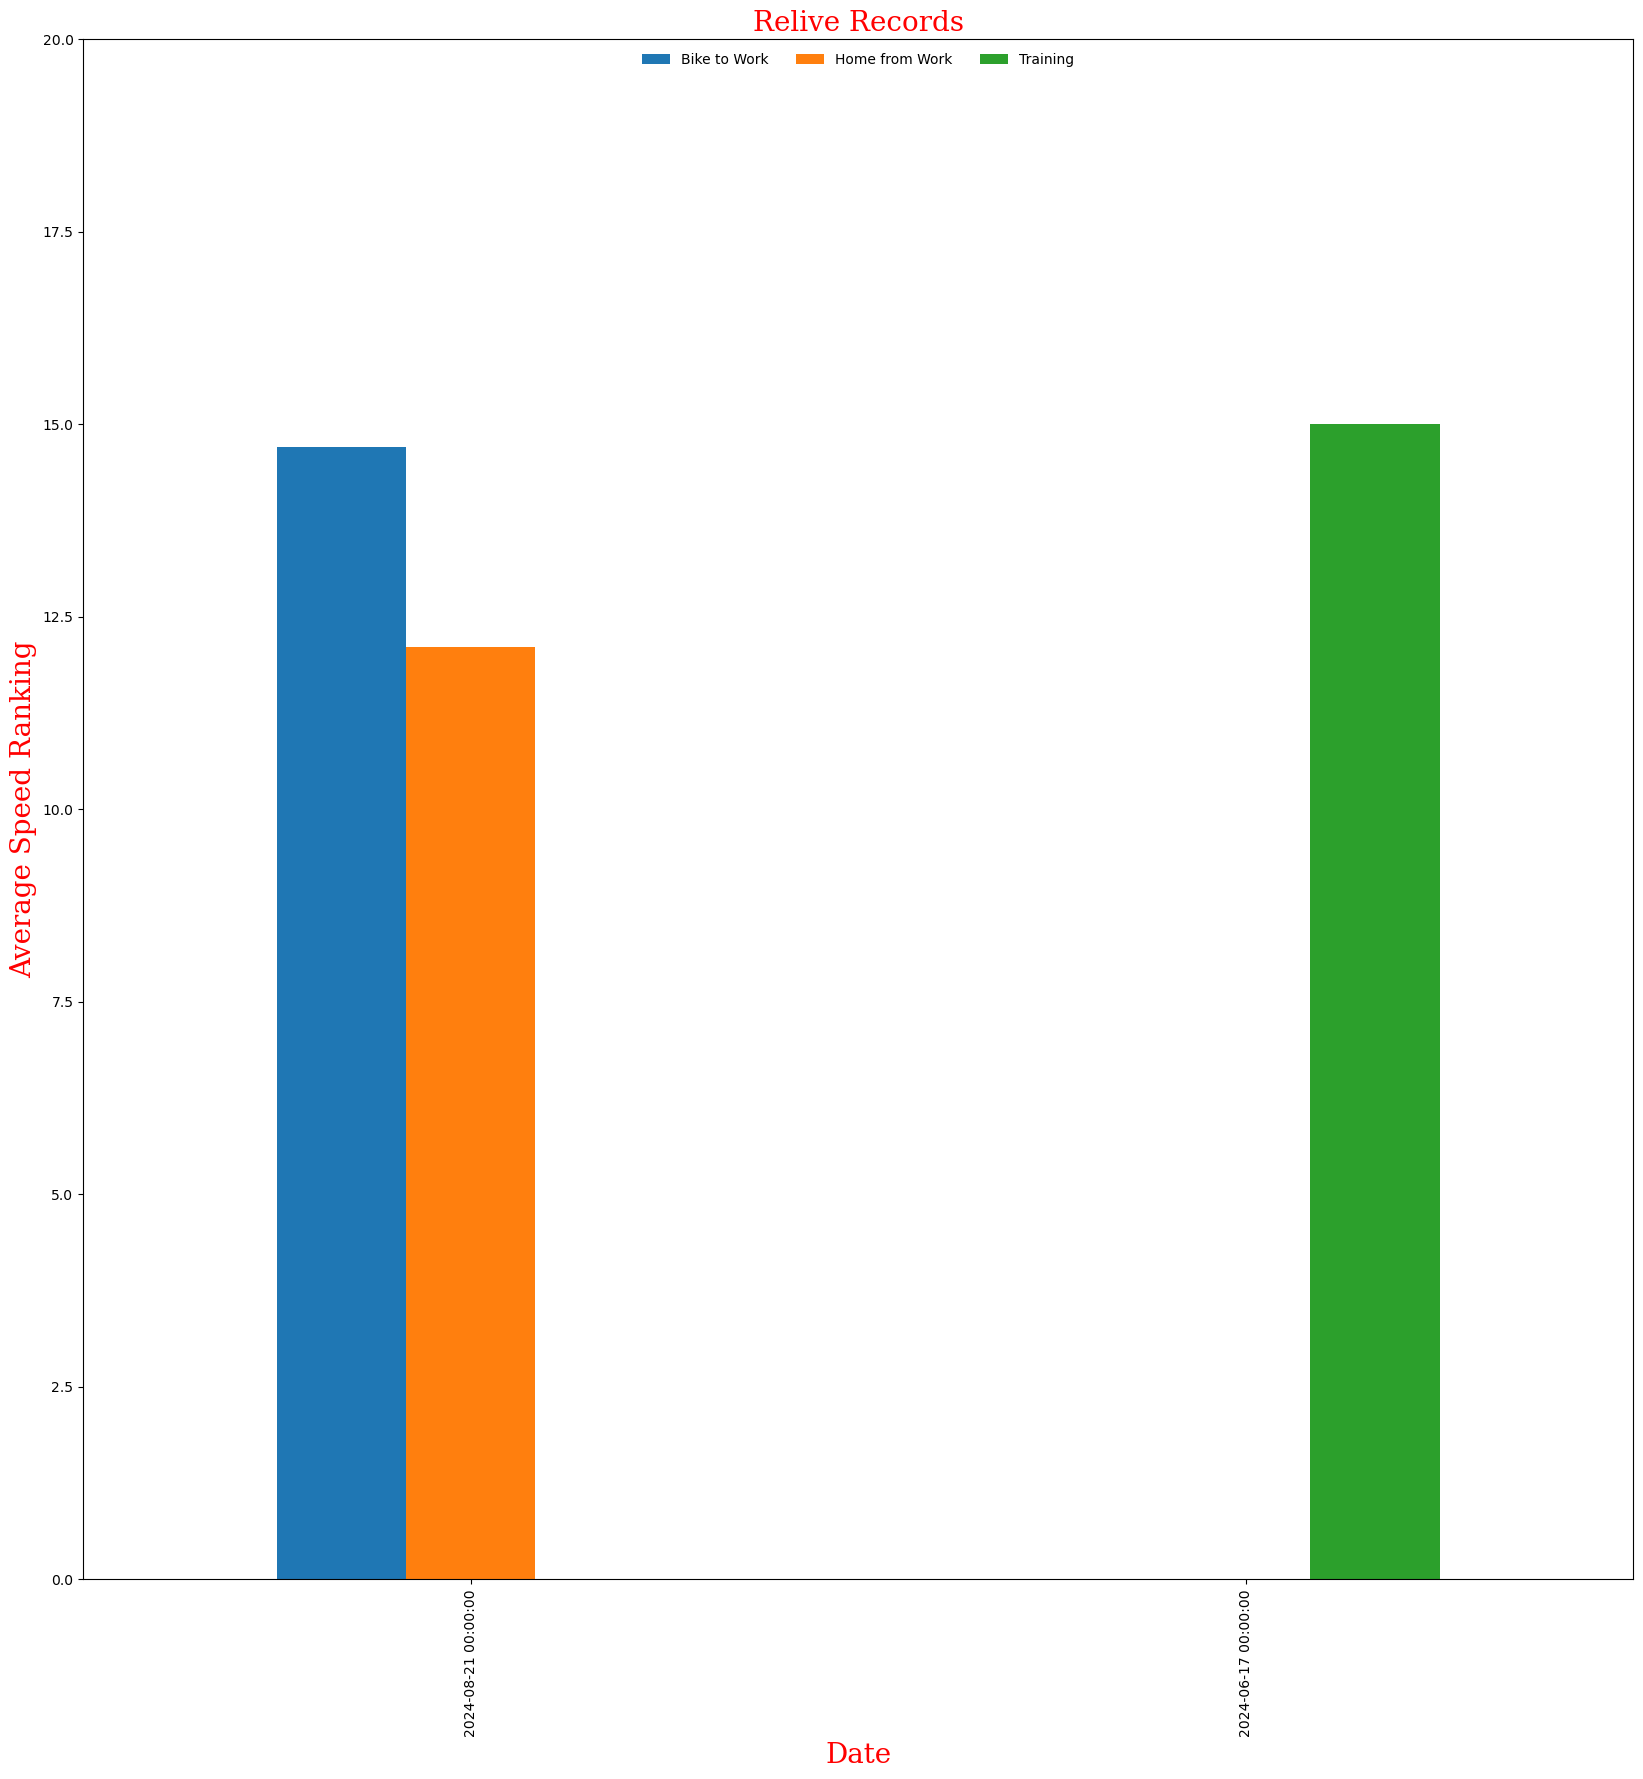

In [44]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
astr.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Relive Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Average Speed Ranking', fontdict=f1)
plt.ylim(0, 20)
plt.savefig("fig/astr_relive.png")
plt.show()

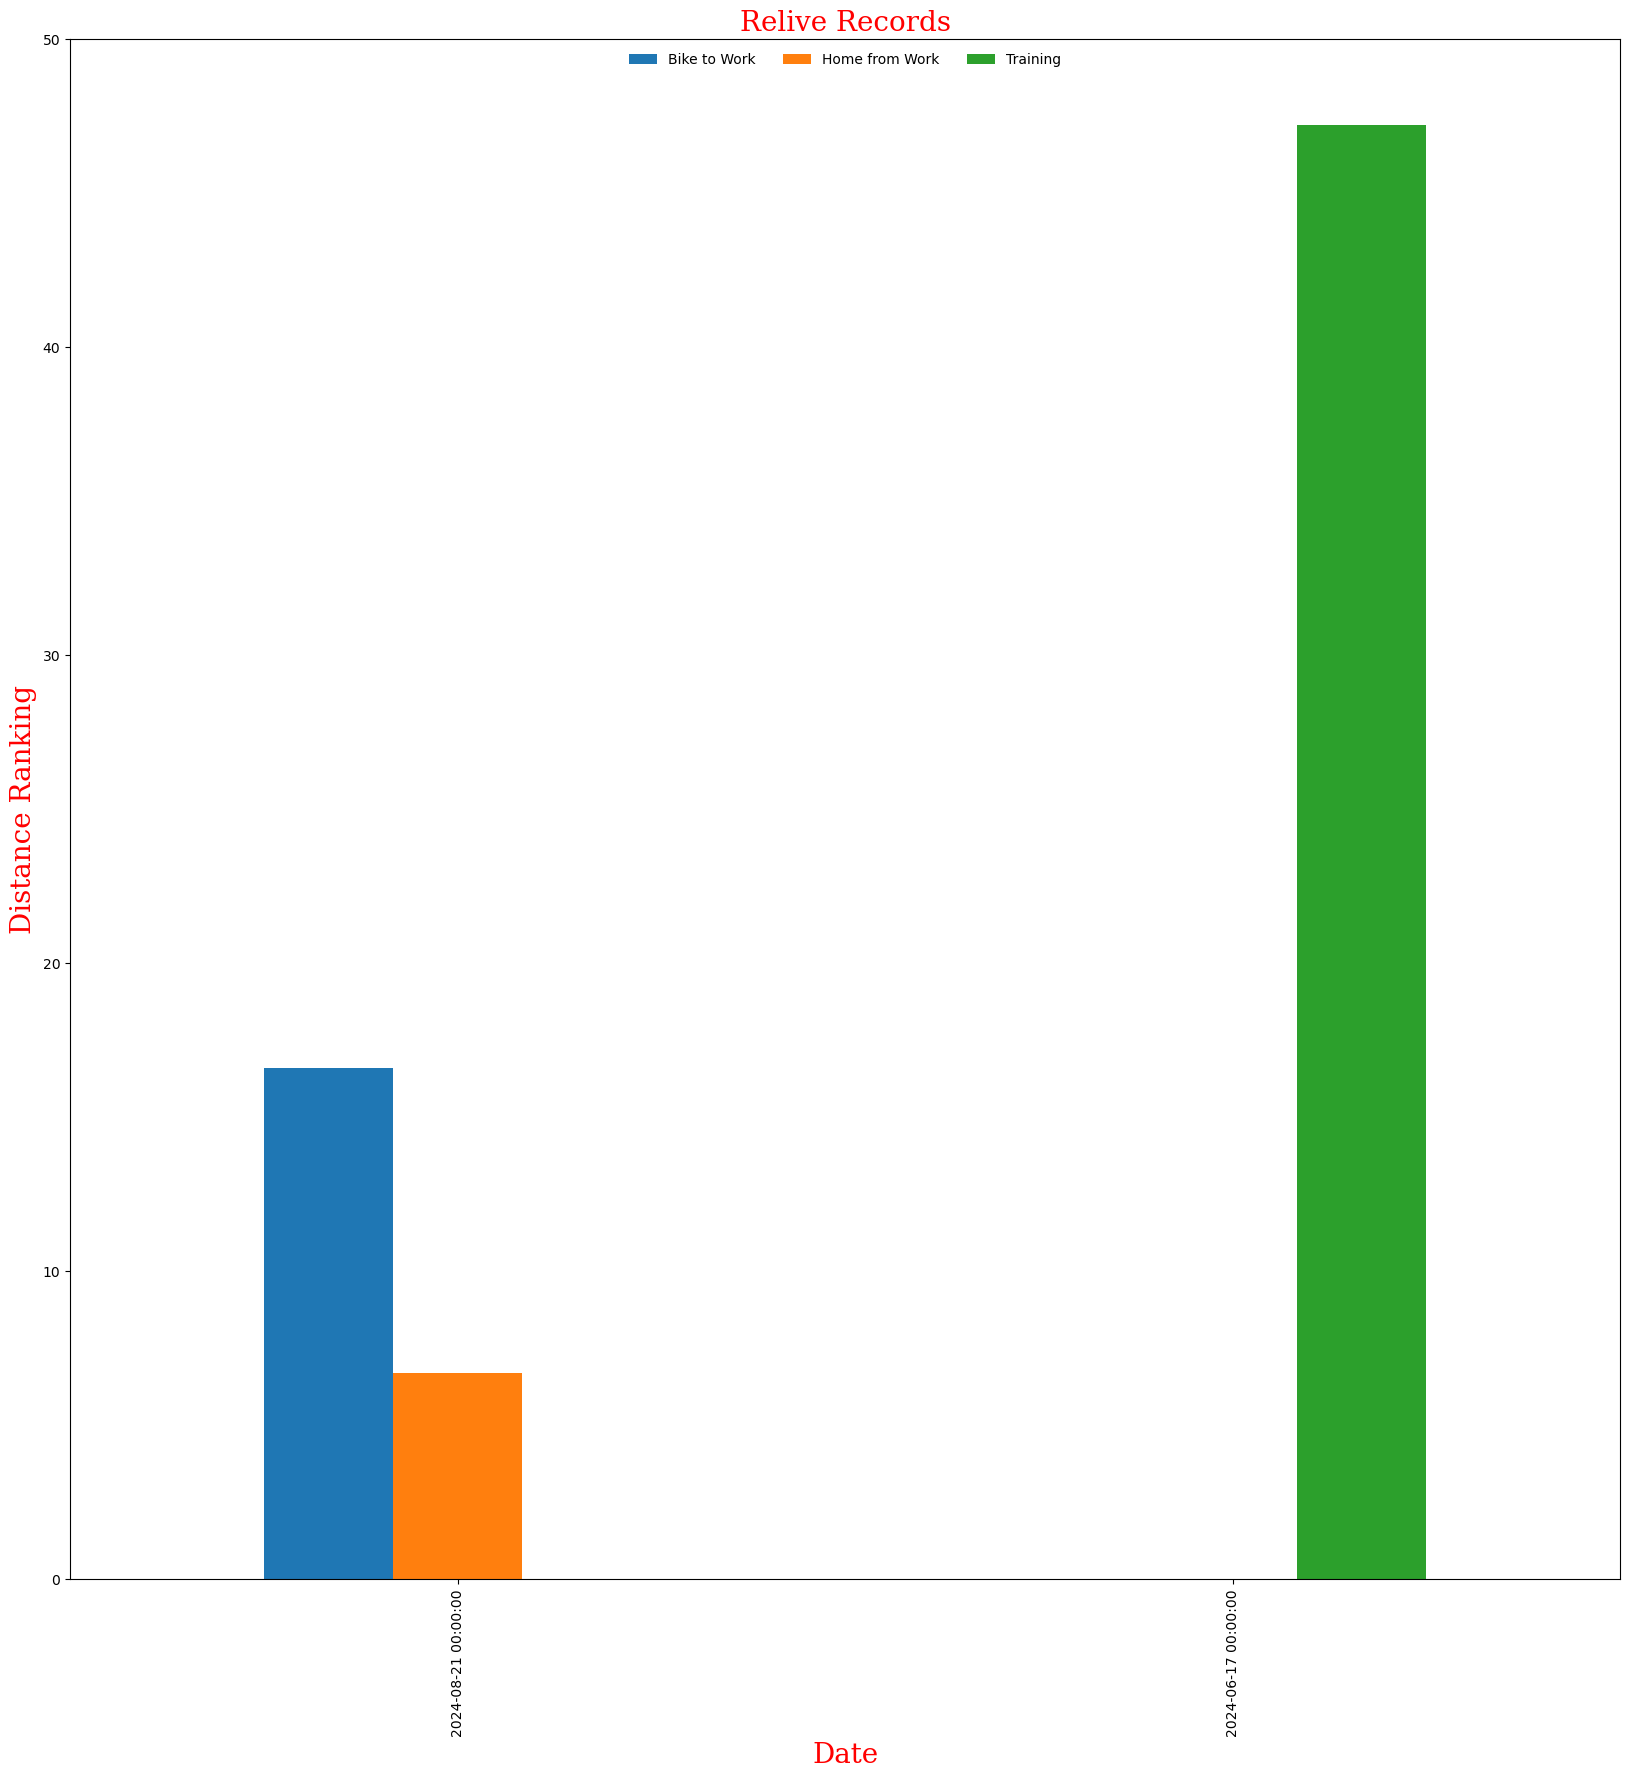

In [46]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
dtr.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Relive Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Distance Ranking', fontdict=f1)
plt.ylim(0, 50)
plt.savefig("fig/dtr_relive.png")
plt.show()

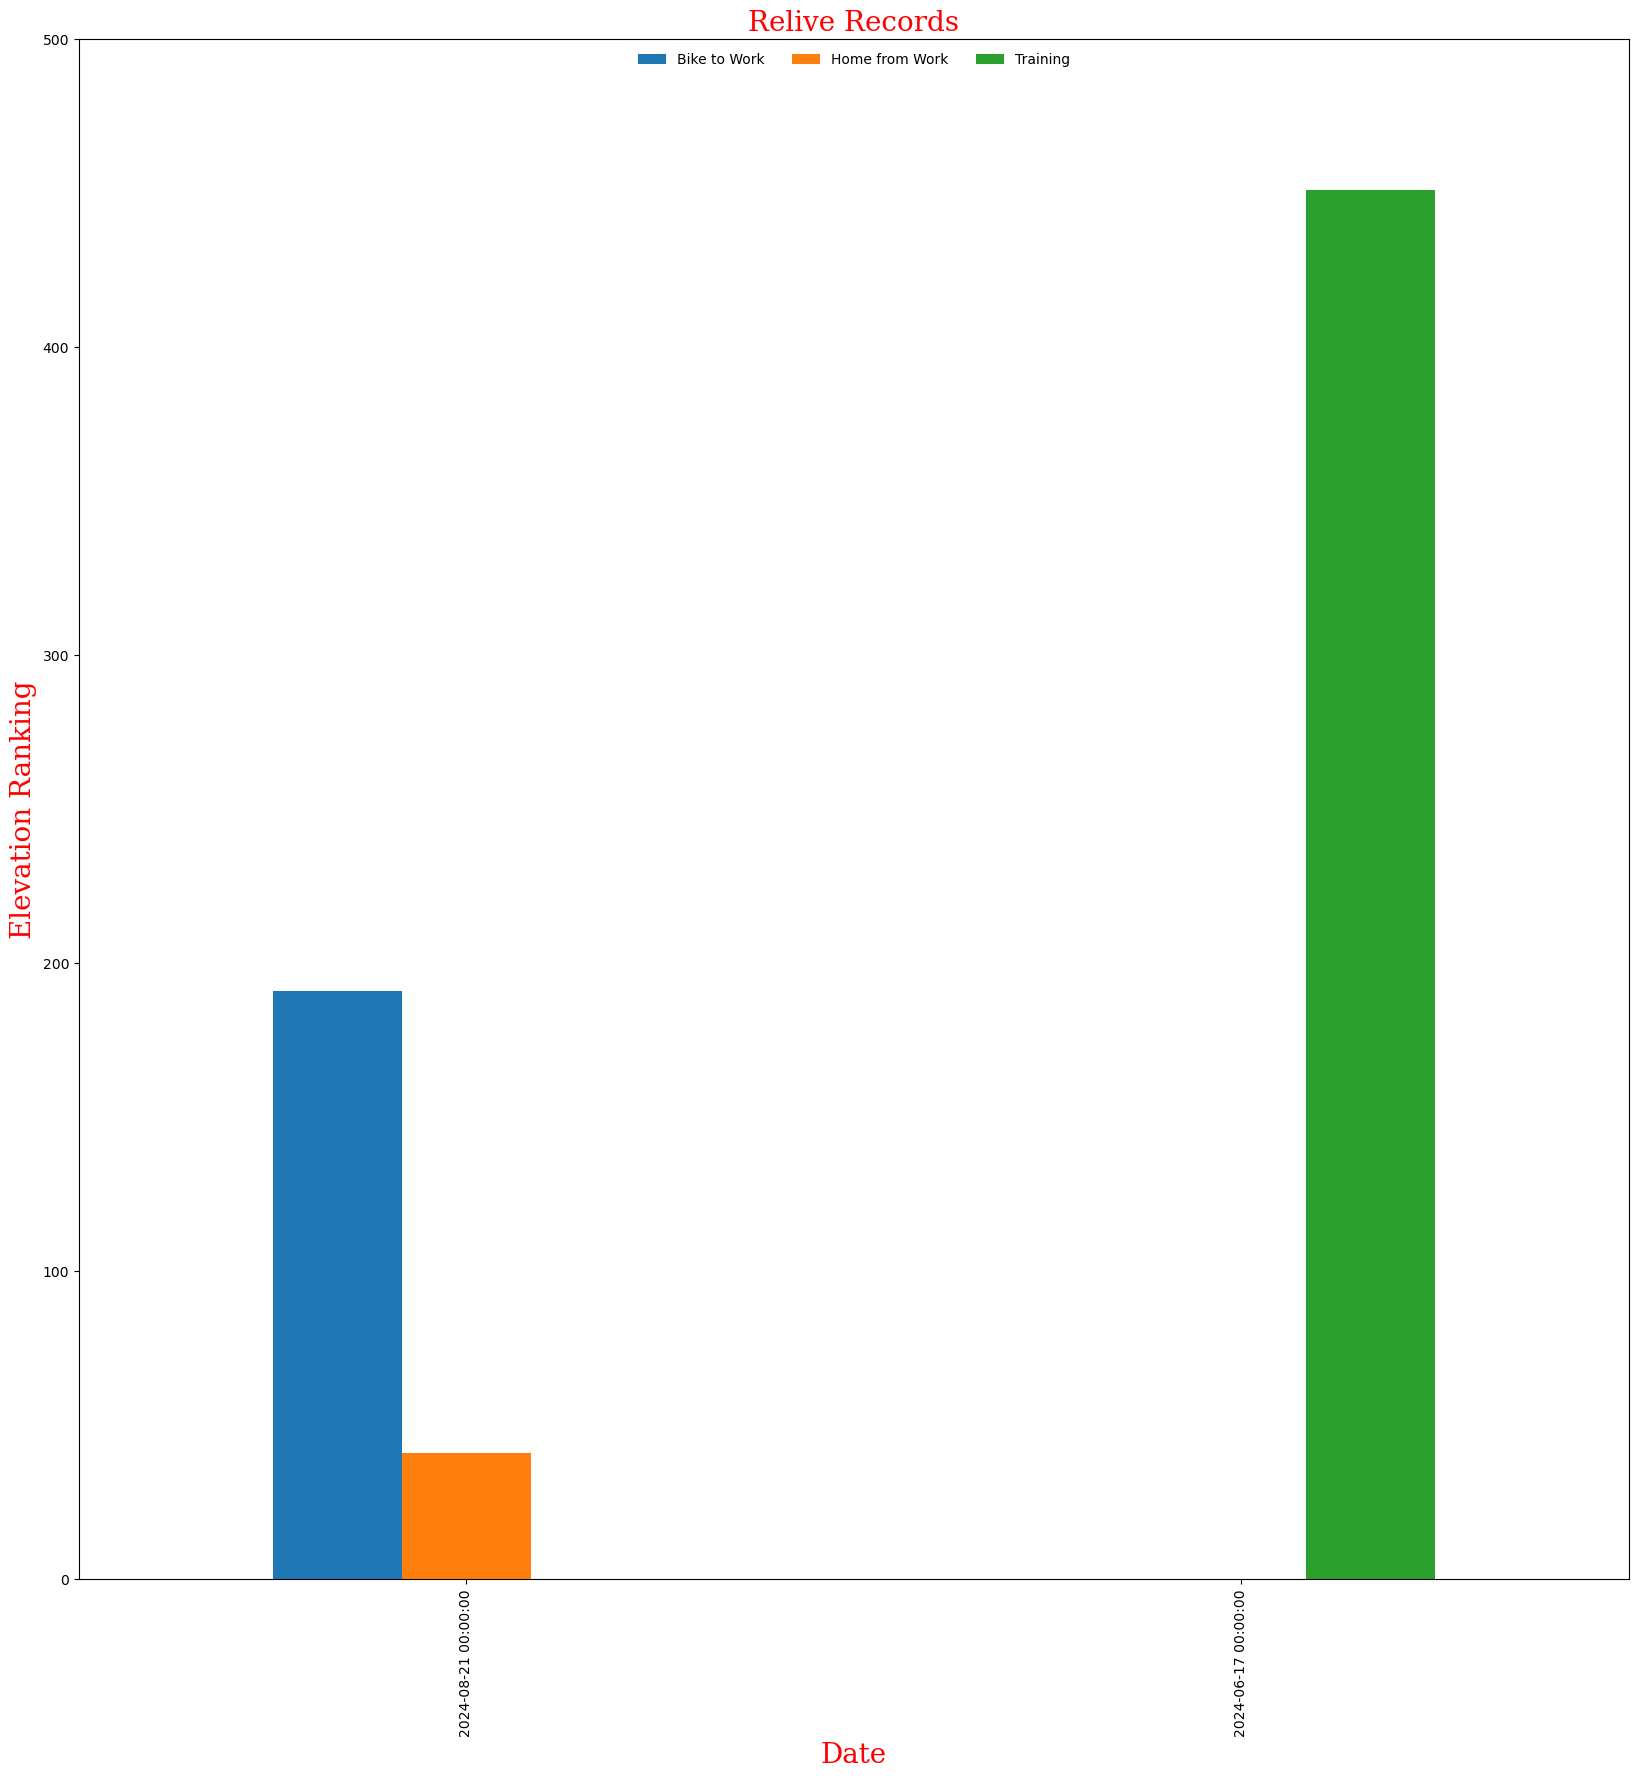

In [47]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
etr.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Relive Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Elevation Ranking', fontdict=f1)
plt.ylim(0, 500)
plt.savefig("fig/etr_relive.png")
plt.show()

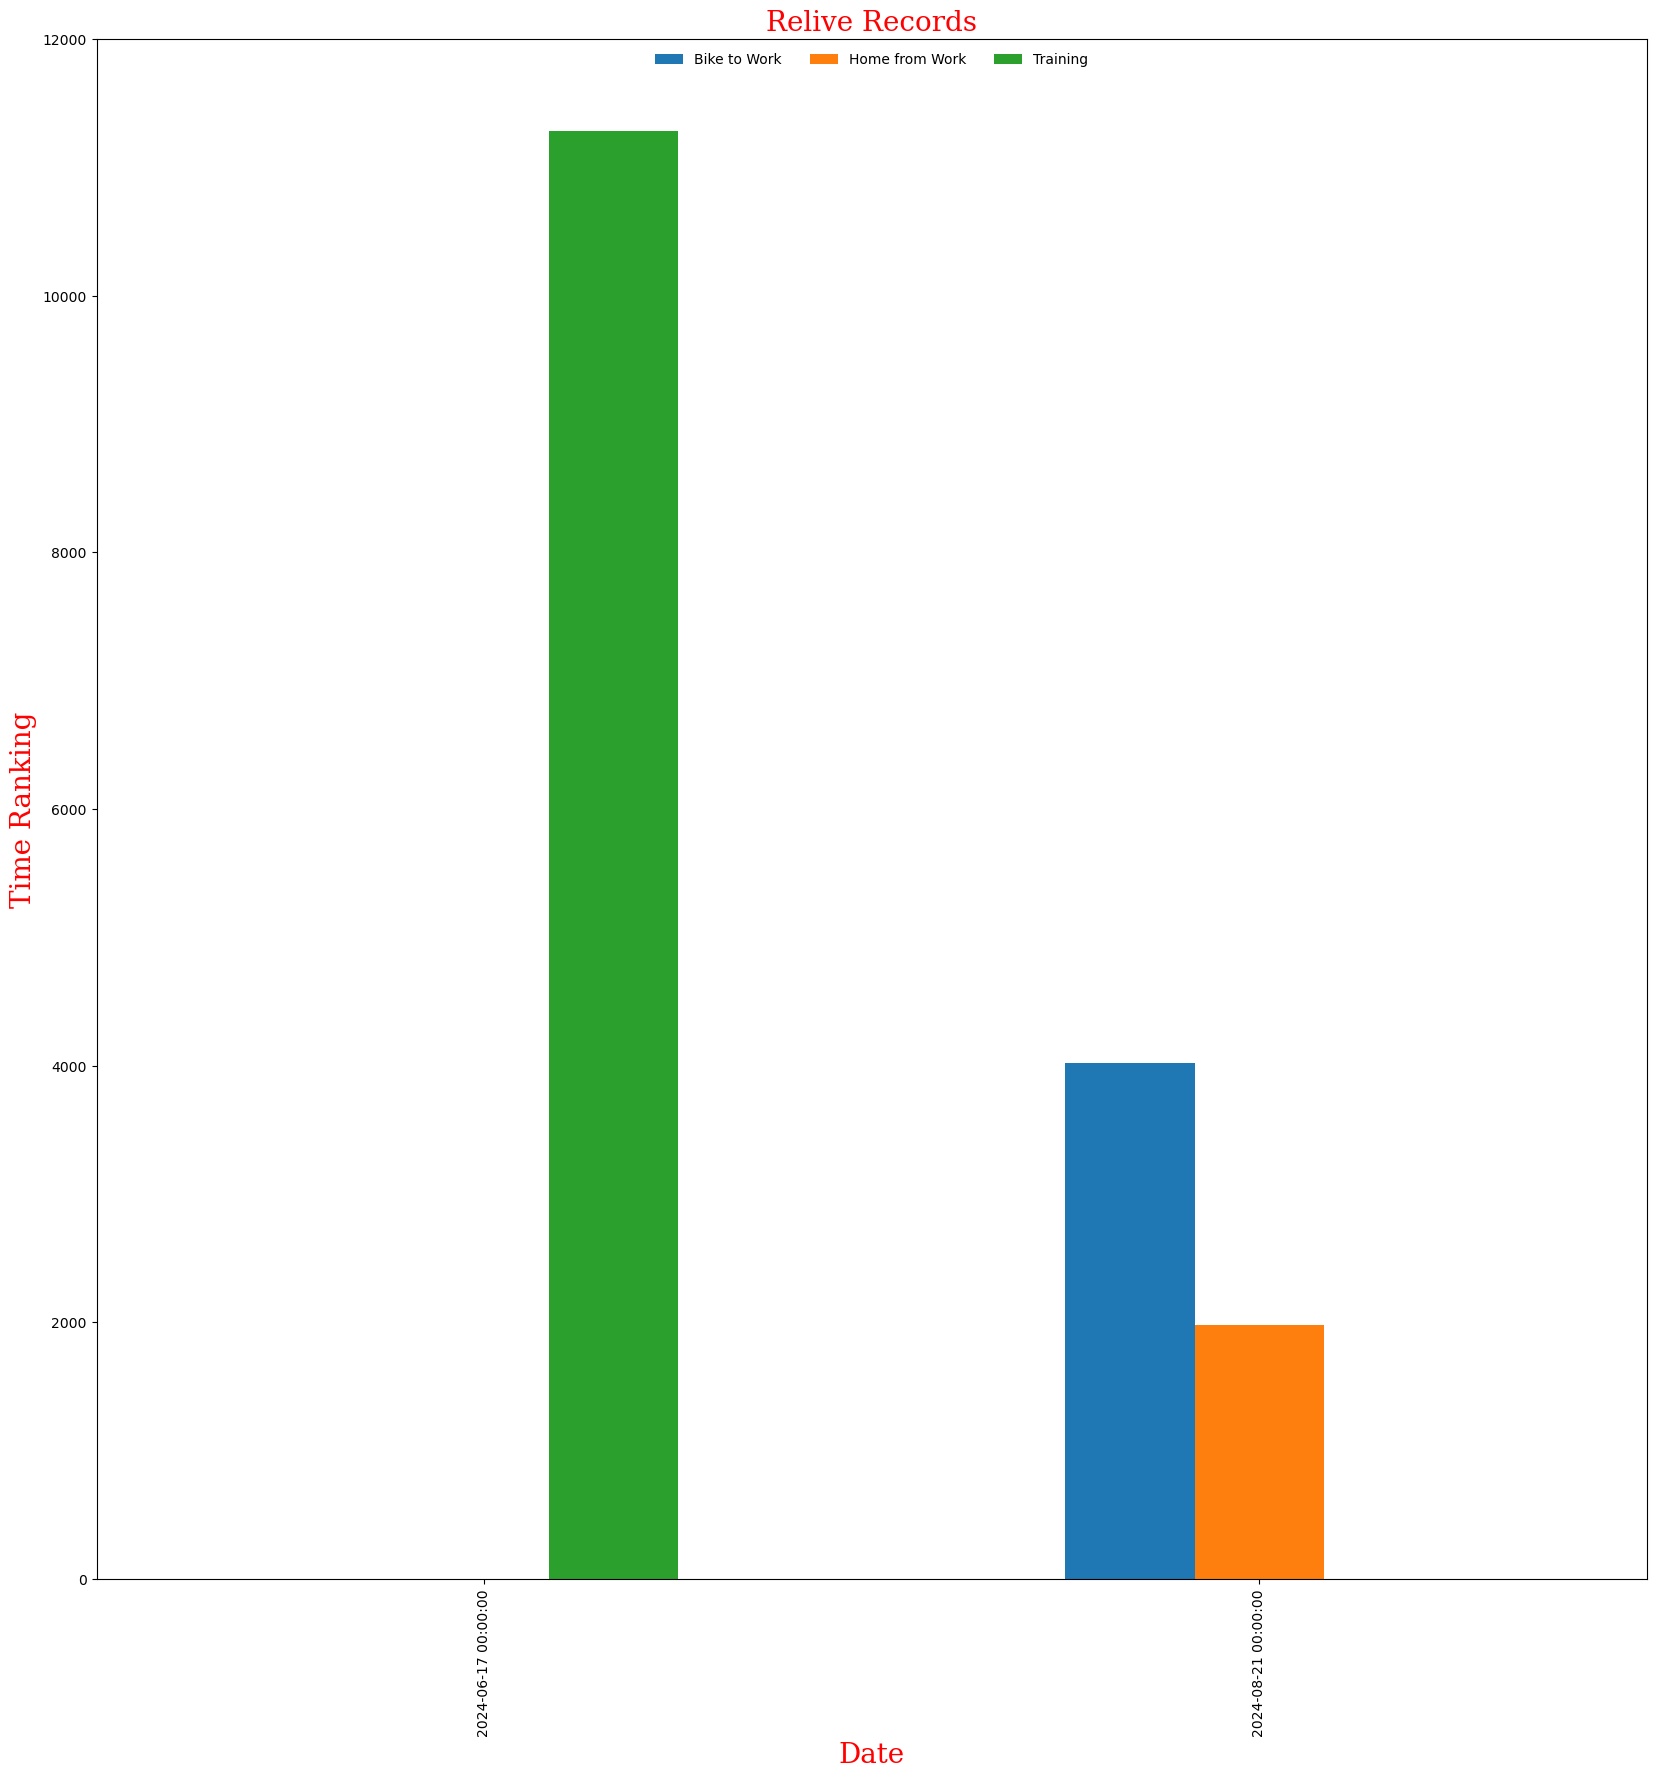

In [48]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
ttr.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Work", "Home from Work", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Relive Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Time Ranking', fontdict=f1)
plt.ylim(0, 12000)
plt.savefig("fig/ttr_relive.png")
plt.show()

In [51]:
# Creating an HTML file 
Func = open("index.html","w") 
   
# Adding input data to the HTML file 
Func.write("<html>\n  <head>\n <title>\n  Relive Records</title>\n   </head>\n  <table border='3' align='center' class='dataframe' style='text-align:left; width:1000px;'>\n   <h2 style='text-align:center;'>\n  Relive Report Summary</h2>\n <thead>\n   <th colspan='18' style='text-align: center; padding:15px; font-size: 20px; background-color:#FFFF00'>General Information</th>\n    </thead>\n   <table border='3' align='center'class='dataframe' style='text-align:left; width:1000px;'>\n<thead>\n<tr style='text-align: center;'>\n<th colspan='3'>Total Records</th>\n<th colspan='3'>Files Loaded</th>\n<th colspan='3'>Category</th>\n<th colspan='3'>Unit</th>\n<th colspan='3'>Purpose</th>\n<th colspan='3'>Count</th>\n</tr>\n</thead>\n<tbody>\n<tr>\n<th colspan='3' rowspan='4' style='text-align: center; font-size: 100px; color:#ffff00; background-color: #454541'>3</th>\n<th colspan='3' rowspan='4' style='text-align: center; font-size: 100px; color:#ffff00; background-color: #454541'>2</th>\n<th colspan='3'>Average Speed [AS]</th>\n<td colspan='3'>kph</td>\n<th colspan='3'>Bike to Work [BtW]</th>\n<td colspan='3'>1</td>\n</tr>\n<tr>\n<th colspan='3'>Distance [Di]</th>\n<td colspan='3'>km</td>\n<th colspan='3'>Home from Work [HfW]</th>\n<td colspan='3'>1</td>\n</tr>\n<tr>\n<th colspan='3'>Elevation [El]</th>\n<td colspan='3'>m</td>\n<th colspan='3' rowspan='2'>Training [Tr]</th>\n<td colspan='3' rowspan='2'>1</td>\n</tr>\n<tr>\n<th colspan='3'>Time [Ti]</th>\n<td colspan='3'>sec</td>\n</tr>\n</tbody>\n</table>\n<table border='3' align='center' class='dataframe' style='text-align:left; width:1000px;'>\n   <thead>\n   <th colspan='18' style='text-align: center; padding:15px; font-size: 20px; background-color:#FFFF00'>Statistics</th>\n    </thead>\n  <table border='3' align='center'class='dataframe' style='text-align:left; width:1000px;'>\n<thead>\n    <tr style='text-align: center;'>\n    <th rowspan='2'>Category</th>\n     <th colspan='3' style='text-align:center'>Min</th>\n      <th colspan='3' style='text-align:center'>Max</th>\n     <th rowspan='2'>Category</th>\n     <th rowspan='2'>Sum</th>\n    </tr>\n<tr>\n         <th>BtW</th>\n      <th>HfW</th>\n         <th>Tr</th>\n      <th>BtW</th>\n      <th>HfW</th>\n        <th>Tr</th>\n    </tr>\n   </thead>\n  <tbody>\n    <tr>\n      <th>AS</th>\n      <td style='font-size: 20px; color:#d12d2d'>14.7</td>\n      <td style='font-size: 20px; color:#d12d2d'>12.1</td>\n          <td style='font-size: 20px; color:#d12d2d'>15.0</td>\n      <td style='font-size: 20px; color:#68d12d'>14.7</td>\n      <td style='font-size: 20px; color:#68d12d'>12.1</td>\n          <td style='font-size: 20px; color:#68d12d'>15.0</td>\n    <th>Di</th>\n   <td style='font-size: 20px; color:#357dc6'>70.5</td>\n    </tr>\n    <tr>\n      <th>Di</th>\n      <td style='font-size: 20px; color:#d12d2d'>16.6</td>\n      <td style='font-size: 20px; color:#d12d2d'>6.7</td>\n         <td style='font-size: 20px; color:#d12d2d'>47.2</td>\n      <td style='font-size: 20px; color:#68d12d'>16.6</td>\n      <td style='font-size: 20px; color:#68d12d'>6.7</td>\n       <td style='font-size: 20px; color:#68d12d'>47.2</td>\n    <th>El</th>\n   <td style='font-size: 20px; color:#357dc6'>683.0</td>\n      </tr>\n    <tr>\n      <th>El</th>\n      <td style='font-size: 20px; color:#d12d2d'>191.0</td>\n     <td style='font-size: 20px; color:#d12d2d'>41.0</td>\n           <td style='font-size: 20px; color:#d12d2d'>451.0	</td>\n      <td style='font-size: 20px; color:#68d12d'>191.0</td>\n      <td style='font-size: 20px; color:#68d12d'>41.0</td>\n           <td style='font-size: 20px; color:#68d12d'>451.0	</td>\n    <th rowspan='2'>Ti</th>\n   <td rowspan='2' style='font-size: 20px; color:#357dc6'>17280.0</td>\n        </tr>\n    <tr>\n      <th>Ti</th>\n      <td style='font-size: 20px; color:#d12d2d'>4020.0</td>\n      <td style='font-size: 20px; color:#d12d2d'>1980.0</td>\n          <td style='font-size: 20px; color:#d12d2d'>11280.0</td>\n      <td style='font-size: 20px; color:#68d12d'>4020.0</td>\n      <td style='font-size: 20px; color:#68d12d'>1980.0</td>\n         <td style='font-size: 20px; color:#68d12d'>11280.0</td>\n    </tr>\n  </tbody>\n</table><table border='3' align='center' class='dataframe' style='text-align:left; width:1000px;'>\n  <thead>\n    <tr>\n      <th colspan='5' style='text-align: center'>Ave</th>\n    </tr>\n    <tr>\n   <th>Purpose</th>\n     <th>Di</th>\n       <th>AS</th>\n          <th>El</th>\n      <th>Ti</th>\n    </tr>\n    </thead>\n  <tbody>\n      <tr>\n      <th>BtW</th>\n      <th>16.6</th>\n      <td>14.7</td>\n      <td>191.0</td>\n      <td>4020.0</td>\n      </tr>\n    <tr>\n      <th>HfW</th>\n      <th>6.7</th>\n      <td>12.1</td>\n          <td>41.0</td>\n      <td>1980.0</td>\n    </tr>\n    <tr>\n      <th>Tr</th>\n      <th>47.2</th>\n          <td>15.0</td>\n      <td>451.0</td>\n      <td>11280.0</td>\n    </tr>\n  </tbody>\n</table><table border='3' align='center' class='dataframe' style='text-align:left; width:1000px;'>\n   <thead>\n   <th colspan='18' style='text-align: center; padding:15px; font-size: 20px; background-color:#FFFF00'>Graph Chart</th>\n    </thead>\n  <table border='3' align='center'class='dataframe' style='text-align:left; width:1000px;'>\n<thead>\n<tr style='text-align: center;'>\n<th colspan='3'><a href='fig/ast_relive.png' target='_blank'>AS</a></th>\n<th colspan='3'><a href='fig/dt_relive.png' target='_blank'>Di</a></th>\n<th colspan='3'><a href='fig/et_relive.png' target='_blank'>El</a></th>\n<th colspan='3'><a href='fig/tt_relive.png' target='_blank'>Ti</a></th>\n</tr>\n<tr style='text-align: center;'>\n<th colspan='3'><a href='fig/astr_relive.png' target='_blank'>ASR</a></th>\n<th colspan='3'><a href='fig/dtr_relive.png' target='_blank'>DiR</a></th>\n<th colspan='3'><a href='fig/etr_relive.png' target='_blank'>ElR</a></th>\n<th colspan='3'><a href='fig/ttr_relive.png' target='_blank'>TiR</a></th>\n</tr>\n</thead>\n<table border='3' align='center' class='dataframe' style='text-align:left; width:1000px;'>\n   <thead>\n   <th colspan='18' style='text-align: center; padding:15px; font-size: 20px; background-color:#FFFF00'>Rankings</th>\n    </thead>\n  <table border='3' align='center'class='dataframe' style='text-align:left; width:1000px;'>\n<thead>\n<tr style='text-align: center;'>\n<th rowspan='2'>Rank</th>\n<th colspan='5' style='background-color:#ffff00'>BtW</th>\n</tr>\n<tr style='text-align: center;'>\n<th>AS</th>\n<th>Di</th>\n<th>El</th>\n<th>Ti</th>\n</tr>\n<tr style='text-align: center;'>\n<th style='font-size:20px; color:#ffff00; background-color: #454541'>1</th>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-08-21	(14.7)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-08-21 (16.6)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-08-21 (191.0)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-08-21 (4020.0)</td>\n</tr>\n      <tr style='text-align: center;'>\n<th rowspan='2'>Rank</th>\n<th colspan='5' style='background-color:#ffff00'>HfW</th>\n</tr>\n<tr style='text-align: center;'>\n<th>AS</th>\n<th>Di</th>\n<th>El</th>\n<th>Ti</th>\n</tr>\n<tr style='text-align: center;'>\n<th style='font-size:20px; color:#ffff00; background-color: #454541'>1</th>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-08-21 (12.1)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-08-21 (6.7)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-08-21 (41.0)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-08-21 (1980.0)</td>\n</tr>\n<tr style='text-align: center;'>\n<th rowspan='2'>Rank</th>\n<th colspan='5' style='background-color:#ffff00'>Tr</th>\n</tr>\n<tr style='text-align: center;'>\n<th>AS</th>\n<th>Di</th>\n<th>El</th>\n<th>Ti</th>\n</tr>\n<tr style='text-align: center;'>\n<th style='font-size:20px; color:#ffff00; background-color: #454541'>1</th>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-06-17 (15.0)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-06-17 (47.2)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-06-17 (451.0)</td>\n<td style='font-size:20px; color:#ffff00; background-color: #454541'>2024-06-17 (11280.0)</td>\n</tr>\n</thead>\n</table>\n</html>\n")
              
# Saving the data into the HTML file 
Func.close()